#Klasifikasi Menggunakan Algoritma Random Forest (dengan Parameter Default)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah klasifikasi dengan menggunakan algoritma Random Forest yang bertujuan untuk prediksi customer churn pada e-commerce XYZ.

Parameter algoritma klasifikasi yang digunakan yaitu parameter default (berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu:
1. Algoritma Random Forest
2. Algoritma SVM
3. Algoritma Decision Tree


Fitur yang dipakai adalah 5 fitur yang paling berkolerasi dengan label churn yaitu:

1. Complain
2. PreferedOrderCat
3. MaritalStatus
4. SatisfactionScore
5. NumberOfDeviceRegistered


In [1]:
#Data Loading

import pandas as pd

url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"
df = pd.read_excel(url, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
#Update Dataframe berdasarkan fitur yang digunakan saja

df=df[['Churn', 'Complain', 'PreferedOrderCat', 'MaritalStatus', 'SatisfactionScore', 'NumberOfDeviceRegistered']]
df

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,Laptop & Accessory,Single,2,3
1,1,1,Mobile,Single,3,4
2,1,1,Mobile,Single,3,4
3,1,0,Laptop & Accessory,Single,5,4
4,1,0,Mobile,Single,5,3
...,...,...,...,...,...,...
5625,0,0,Laptop & Accessory,Married,1,2
5626,0,0,Fashion,Married,5,5
5627,0,1,Laptop & Accessory,Married,4,2
5628,0,0,Laptop & Accessory,Married,4,5


In [ ]:
#Merge Data yang sama

#Di PreferredOrderCat, 'Mobile' dan 'Mobile Phone' digabung
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

df['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [ ]:
#Lihat rangkuman data apakah ada missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Churn                     5630 non-null   int64 
 1   Complain                  5630 non-null   int64 
 2   PreferedOrderCat          5630 non-null   object
 3   MaritalStatus             5630 non-null   object
 4   SatisfactionScore         5630 non-null   int64 
 5   NumberOfDeviceRegistered  5630 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 264.0+ KB


In [ ]:
#Encoding

from sklearn.preprocessing import StandardScaler , LabelEncoder
le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df

<ipython-input-37-bfaa2231e0b8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-bfaa2231e0b8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,2,2,2,3
1,1,1,3,2,3,4
2,1,1,3,2,3,4
3,1,0,2,2,5,4
4,1,0,3,2,5,3
...,...,...,...,...,...,...
5625,0,0,2,1,1,2
5626,0,0,0,1,5,5
5627,0,1,2,1,4,2
5628,0,0,2,1,4,5


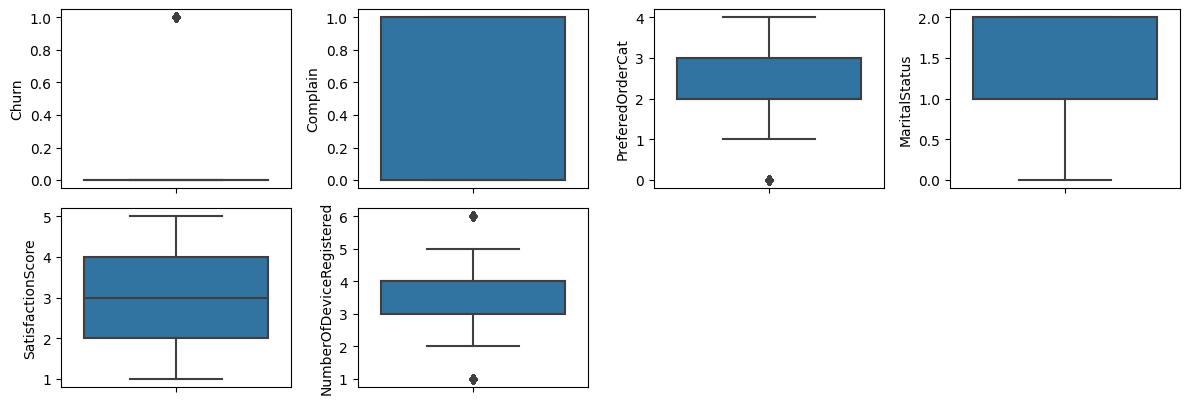

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#BoxPlot untuk melihat outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
#fungsi untuk trimming outliers dengan IQR (Inter-Quartile Range)

def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Complain', 'PreferedOrderCat', 'MaritalStatus',
       'SatisfactionScore', 'NumberOfDeviceRegistered'],
      dtype='object')

In [ ]:
#apply fungsi ke kolom yang memiliki outliers

cols_outliers = ['PreferedOrderCat', 'NumberOfDeviceRegistered']
for col in cols_outliers:
    df = handle_outliers(df , col)

df.head()

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
0,1,1,2,2,2,3
1,1,1,3,2,3,4
2,1,1,3,2,3,4
3,1,0,2,2,5,4
4,1,0,3,2,5,3


In [ ]:
#Lihat rangkuman data setelah trimming outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4448 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Churn                     4448 non-null   int64
 1   Complain                  4448 non-null   int64
 2   PreferedOrderCat          4448 non-null   int64
 3   MaritalStatus             4448 non-null   int64
 4   SatisfactionScore         4448 non-null   int64
 5   NumberOfDeviceRegistered  4448 non-null   int64
dtypes: int64(6)
memory usage: 243.2 KB


In [ ]:
#reset index sesuai jumlah baris data

df.reset_index()
df = pd.concat([df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4448 entries, 0 to 4447
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Churn                     4448 non-null   int64
 1   Complain                  4448 non-null   int64
 2   PreferedOrderCat          4448 non-null   int64
 3   MaritalStatus             4448 non-null   int64
 4   SatisfactionScore         4448 non-null   int64
 5   NumberOfDeviceRegistered  4448 non-null   int64
dtypes: int64(6)
memory usage: 208.6 KB


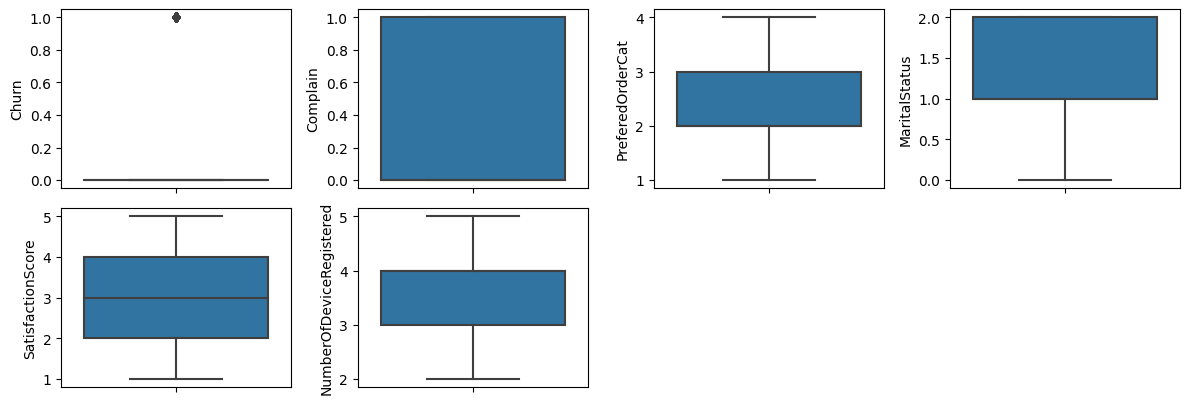

In [ ]:
#Boxplot setelah Trimming Outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
#mengetahui korelasi dari tiap kolom terhadap label churn
#default method in pandas menggunakan Pearson

corr_matrix = df.corr()
corr_matrix

,Churn,Complain,PreferedOrderCat,MaritalStatus,SatisfactionScore,NumberOfDeviceRegistered
Churn,1.000000,0.274961,0.167177,0.156856,0.117313,0.079798
Complain,0.274961,1.000000,0.003805,-0.003698,-0.031006,0.001356
PreferedOrderCat,0.167177,0.003805,1.000000,0.048836,0.014099,0.020725
MaritalStatus,0.156856,-0.003698,0.048836,1.000000,-0.035863,0.044848
SatisfactionScore,0.117313,-0.031006,0.014099,-0.035863,1.000000,-0.008028
NumberOfDeviceRegistered,0.079798,0.001356,0.020725,0.044848,-0.008028,1.000000


<Axes: >

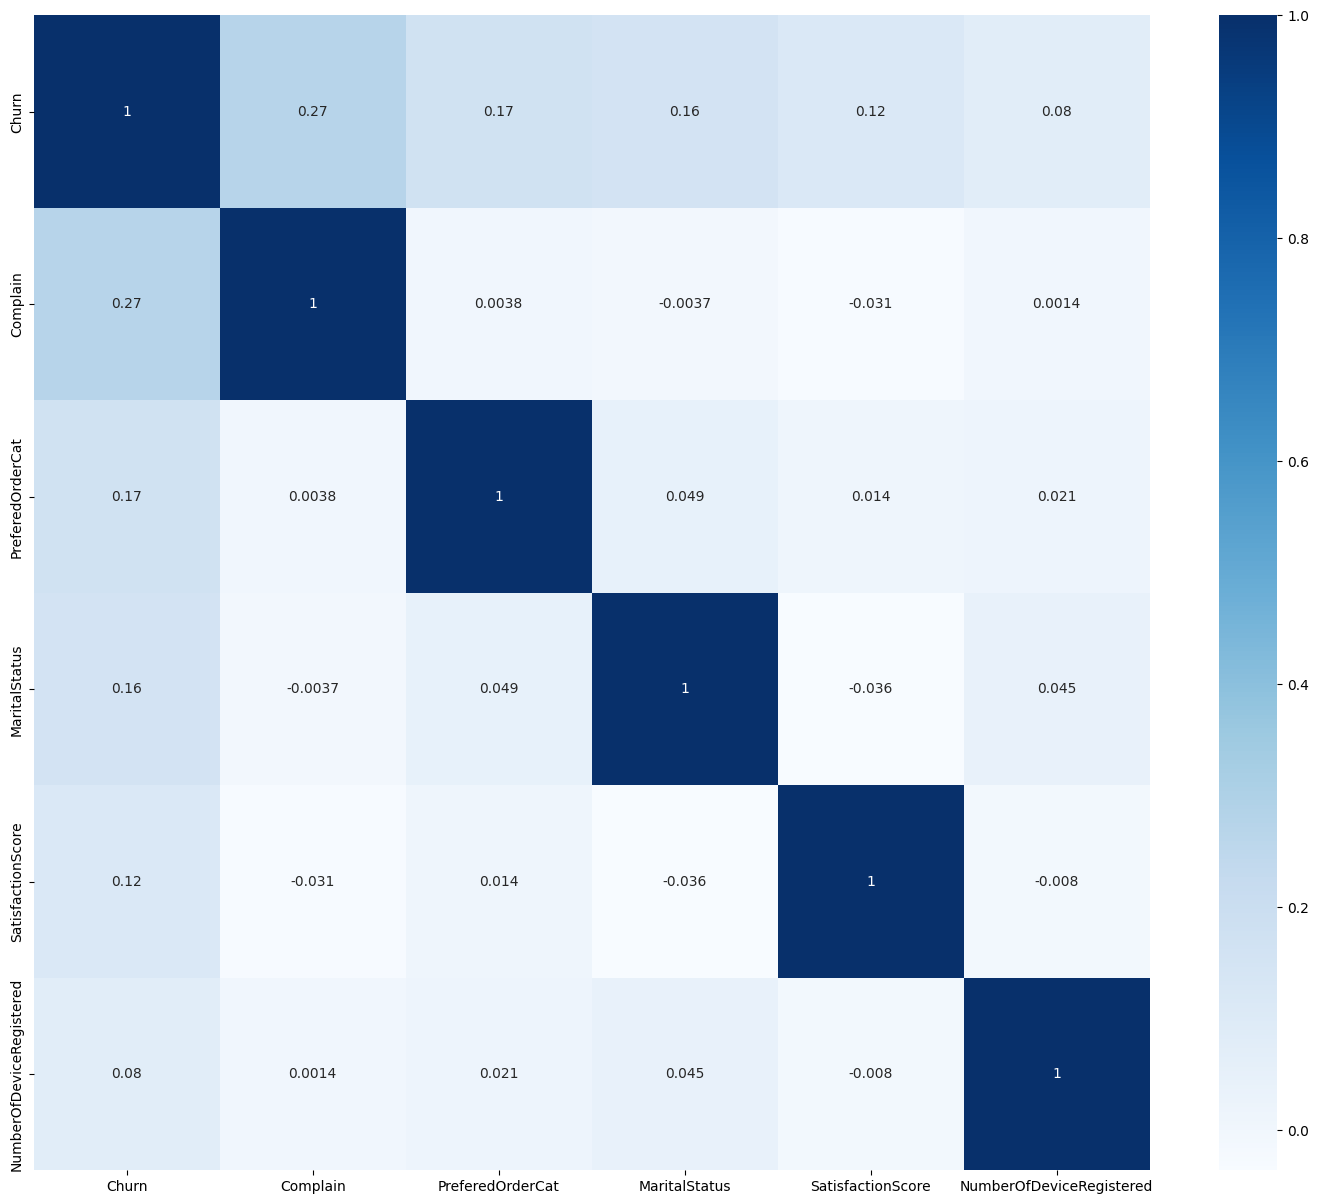

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [ ]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                       1.000000
Complain                    0.274961
PreferedOrderCat            0.167177
MaritalStatus               0.156856
SatisfactionScore           0.117313
NumberOfDeviceRegistered    0.079798
Name: Churn, dtype: float64

In [ ]:
#Handling Imbalanced Data

import matplotlib.pyplot as plt
import plotly.express as px

fig = px.histogram(df, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

In [ ]:
#Over-sampling dengan SMOTE = interpolasi data baru dari data minoritas yang besar kemungkinannya membuat sample yang noisy
#Under-sampling dengan Tomek Links = membersihkan noisy samples dengan under-sampling

from imblearn.combine import SMOTETomek

X = df.drop('Churn' , axis = 1)
Y = df['Churn']

smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

x_over.shape, y_over.shape

((7400, 5), (7400,))

#Classification Modelling

Model algoritma yang digunakan yaitu:


1.   Random Forest
2.   SVM
3.   Decision Tree

dengan parameter default.



In [ ]:
#Split Data

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [ ]:
#Normalisasi Data

from sklearn.preprocessing import MinMaxScaler

MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

rf_clf = RandomForestClassifier()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()

In [ ]:
clf_list = [rf_clf, svm_clf, dt_clf]
clf_name_list = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

for clf in clf_list:
  clf.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Random Forest
Training Score: 0.7843629343629344
Test Score: 0.7684684684684685
Acc Train: 0.7843629343629344
Acc Test: 0.7684684684684685
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Training Score: 0.7525096525096525
Test Score: 0.7472972972972973
Acc Train: 0.7525096525096525
Acc Test: 0.7472972972972973
                                                            
************************************************************
                                                            
Using model: Decision Tree
Training Score: 0.7843629343629344
Test Score: 0.7684684684684685
Acc Train: 0.7843629343629344
Acc Test: 0.7684684684684685
                                                            
************************************************************
                                               

Accuracy = 0.7675675675675676
Precision = 0.7569444444444444
Recall = 0.7870036101083032
F1-Score = 0.7716814159292036
ROC Area under Curve = 0.7676025244786121
              precision    recall  f1-score   support

           0    0.77903   0.74820   0.76330      1112
           1    0.75694   0.78700   0.77168      1108

    accuracy                        0.76757      2220
   macro avg    0.76799   0.76760   0.76749      2220
weighted avg    0.76801   0.76757   0.76748      2220



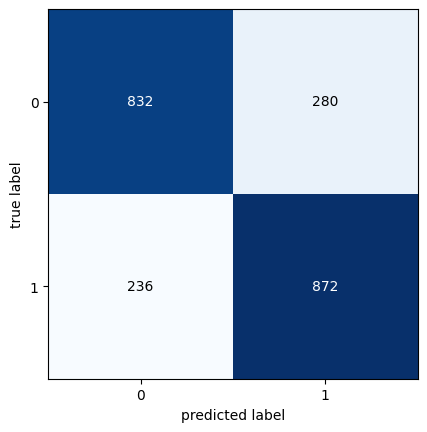

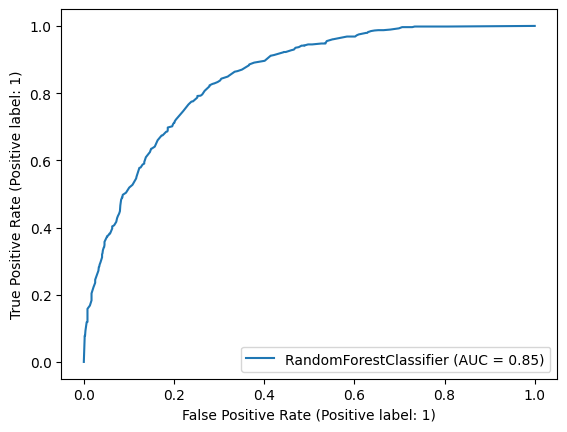

In [ ]:
#Evaluasi Random Forest

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1))
print("ROC Area under Curve = {}".format(roc_auc4))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.7472972972972973
Precision = 0.7668292682926829
Recall = 0.7093862815884476
F1-Score = 0.7369901547116736
ROC Area under Curve = 0.7472291120172454
              precision    recall  f1-score   support

           0    0.73054   0.78507   0.75683      1112
           1    0.76683   0.70939   0.73699      1108

    accuracy                        0.74730      2220
   macro avg    0.74869   0.74723   0.74691      2220
weighted avg    0.74865   0.74730   0.74693      2220



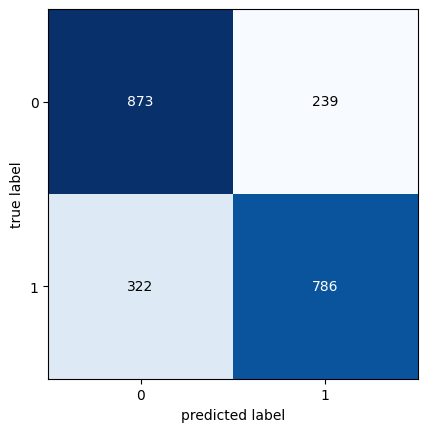

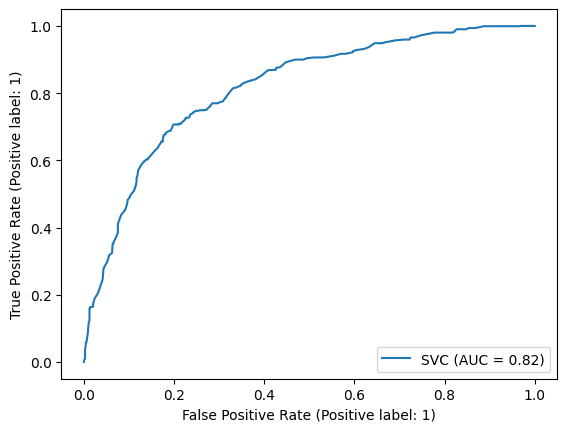

In [ ]:
#Evaluasi Support Vector Machine

model=SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1svm = f1_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1svm))
print("ROC Area under Curve = {}".format(roc_auc2))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.7684684684684685
Precision = 0.7582608695652174
Recall = 0.7870036101083032
F1-Score = 0.7723649247121346
ROC Area under Curve = 0.7685018050541516
              precision    recall  f1-score   support

           0    0.77944   0.75000   0.76444      1112
           1    0.75826   0.78700   0.77236      1108

    accuracy                        0.76847      2220
   macro avg    0.76885   0.76850   0.76840      2220
weighted avg    0.76887   0.76847   0.76839      2220



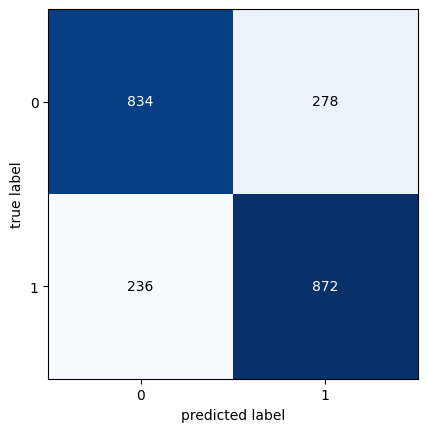

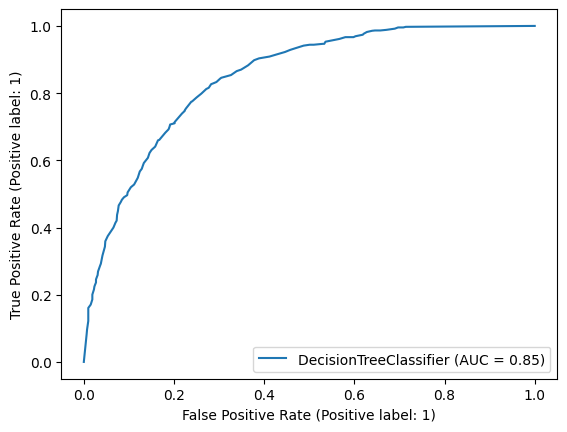

In [ ]:
#Evaluasi Decision Tree

model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1dt = f1_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1dt))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)